# Auto ML using H2O

**Context**

An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

**Link to the Data Set**: [kaggle-dataset](https://https://www.kaggle.com/datasets/prachi13/customer-analytics)

**Content**

The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

**ID**: ID Number of Customers.

**Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

**Mode of shipment**:The Company Ships the products in multiple way such as Ship, Flight and Road.

**Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.

**Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

**Cost of the product**: Cost of the Product in US Dollars.

**Prior purchases**: The Number of Prior Purchase.

**Product importance**: The company has categorized the product in the various parameter such as low, medium, high.

**Gender**: Male and Female.

**Discount offered**: Discount offered on that specific product.

**Weight in gms**: It is the weight in grams.

**Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

**Summary**: The dataset is consistent, with no missing values or outliers.

Questions on Auto ML

* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?

# **Abstract**
In this assignment we use Auto ML h2o library to train different models on our data and try to answer above questions.

In [ ]:
# install java
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 33 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=28b7abe4636015234f83d0f1d0e47777000711c36e0eb67b9da1cd05fa366980
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 22 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_wbg59w
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.076 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# importing required libraries for performing data analysis
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.testing as tm
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (8, 5)

In [80]:
# Reading the data from the file
data = pd.read_csv('https://raw.githubusercontent.com/chelpuri/datascience/main/Train.csv')
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


# Pre-Processing

In [81]:
# dropping ID column as it is just unique value representing data.
data = data.drop("ID", 1)

In [82]:
#adding dummy data to categorical_columns to include additional predictor varibles
data = pd.get_dummies(data)
data

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,4,2,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1,1,0,0,0,0,0,0,1,0,0,1,1,0
10995,4,1,232,5,6,1247,0,0,1,0,0,0,0,0,1,0,0,1,1,0
10996,5,4,242,5,4,1155,0,0,0,1,0,0,0,0,1,0,1,0,1,0
10997,5,2,223,6,2,1210,0,0,0,0,0,1,0,0,1,0,0,1,0,1


<Axes: >

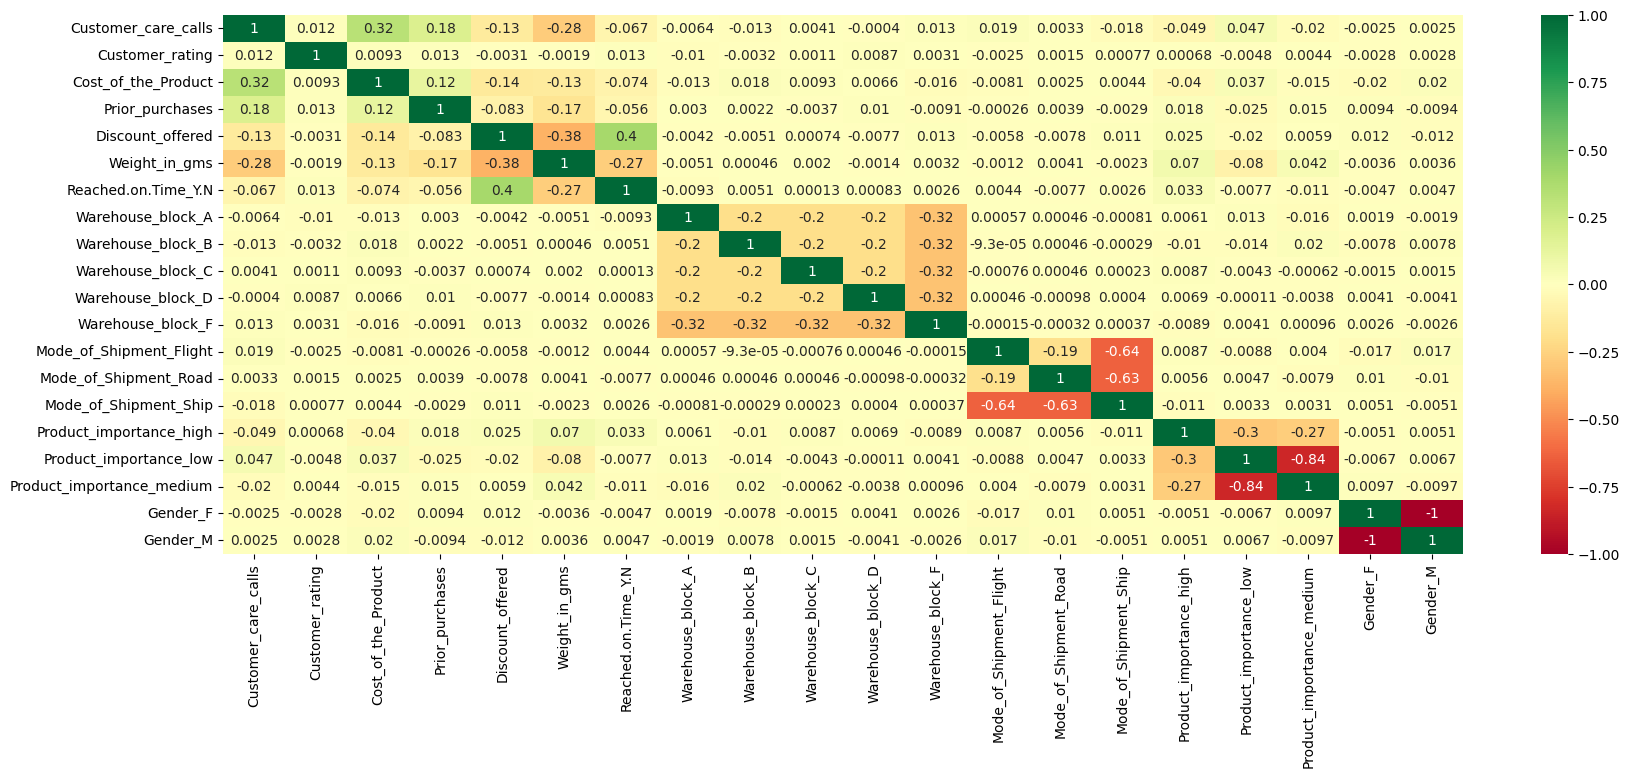

In [83]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

In [84]:
import statsmodels.api as sm

model = sm.Logit(
    data["Reached.on.Time_Y.N"],
    data[
        [
            "Customer_care_calls",
            "Customer_rating",
            "Cost_of_the_Product",
            "Prior_purchases",
            "Discount_offered",
            "Weight_in_gms",
            "Warehouse_block_A",
            "Warehouse_block_B",
            "Warehouse_block_C",
            "Warehouse_block_D",
            "Mode_of_Shipment_Flight",
            "Mode_of_Shipment_Road",
            "Product_importance_high",
            "Product_importance_low",
            "Gender_F",
        ]
    ],
).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.548155
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Reached.on.Time_Y.N   No. Observations:                10999
Model:                           Logit   Df Residuals:                    10984
Method:                            MLE   Df Model:                           14
Date:                 Tue, 20 Feb 2024   Pseudo R-squ.:                  0.1871
Time:                         01:23:49   Log-Likelihood:                -6029.2
converged:                        True   LL-Null:                       -7417.0
Covariance Type:             nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Customer_care_calls        -0.0406      0.019     -2.100      0.036      -0.078      -0.003
Customer_rating             0.0512      0.015      3.416      0.001       0.022       0.081
Cost_of_the_Product        -0.0001      0.000     -0.239      0.811      -0.001       0.001
Prior_purchases            -0.0428      0.014     -3.001      0.003      -0.071      -0.015
Discount_offered            0.1217      0.004     27.925      0.000       0.113       0.130
Weight_in_gms              -0.0002   1.15e-05    -13.957      0.000      -0.000      -0.000
Warehouse_block_A           0.0172      0.065      0.267      0.789      -0.109       0.144
Warehouse_block_B           0.0887      0.065      1.367      0.172      -0.038       0.216
Warehouse_block_C           0.0637      0.065      0.981      0.326      -0.063       0.191
Warehouse_block_D           0.0740      0.065      1.145      0.252      -0.053       0.201
Mode_of_Shipment_Flight     0.0470      0.060      0.785      0.433      -0.070       0.165
Mode_of_Shipment_Road       0.0085      0.060      0.141      0.888      -0.110       0.127
Product_importance_high     0.3543      0.083      4.244      0.000       0.191       0.518
Product_importance_low      0.0391      0.045      0.867      0.386      -0.049       0.128
Gender_F                   -0.0110      0.043     -0.256      0.798      -0.096       0.074
===========================================================================================
"""

In [85]:
import statsmodels.api as sm

model = sm.OLS(
    data["Reached.on.Time_Y.N"],
    data[
        [
            "Customer_care_calls",
            "Customer_rating",
            "Cost_of_the_Product",
            "Prior_purchases",
            "Discount_offered",
            "Weight_in_gms",
            "Warehouse_block_A",
            "Warehouse_block_B",
            "Warehouse_block_C",
            "Warehouse_block_D",
            "Mode_of_Shipment_Flight",
            "Mode_of_Shipment_Road",
            "Product_importance_high",
            "Product_importance_low",
            "Gender_F",
        ]
    ],
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Reached.on.Time_Y.N   R-squared (uncentered):                   0.651
Model:                             OLS   Adj. R-squared (uncentered):              0.651
Method:                  Least Squares   F-statistic:                              1368.
Date:                 Tue, 20 Feb 2024   Prob (F-statistic):                        0.00
Time:                         01:23:52   Log-Likelihood:                         -6973.3
No. Observations:                10999   AIC:                                  1.398e+04
Df Residuals:                    10984   BIC:                                  1.409e+04
Df Model:                           15                                                  
Covariance Type:             nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Customer_care_calls         0.0214      0.004      5.553      0.000       0.014       0.029
Customer_rating             0.0244      0.003      8.171      0.000       0.019       0.030
Cost_of_the_Product         0.0008   8.51e-05      9.949      0.000       0.001       0.001
Prior_purchases             0.0063      0.003      2.233      0.026       0.001       0.012
Discount_offered            0.0131      0.000     48.699      0.000       0.013       0.014
Weight_in_gms            -5.51e-06   2.44e-06     -2.256      0.024   -1.03e-05   -7.22e-07
Warehouse_block_A           0.0342      0.013      2.641      0.008       0.009       0.060
Warehouse_block_B           0.0497      0.013      3.833      0.000       0.024       0.075
Warehouse_block_C           0.0396      0.013      3.057      0.002       0.014       0.065
Warehouse_block_D           0.0437      0.013      3.374      0.001       0.018       0.069
Mode_of_Shipment_Flight     0.0277      0.012      2.304      0.021       0.004       0.051
Mode_of_Shipment_Road       0.0138      0.012      1.144      0.253      -0.010       0.037
Product_importance_high     0.0834      0.016      5.129      0.000       0.052       0.115
Product_importance_low      0.0348      0.009      3.854      0.000       0.017       0.052
Gender_F                    0.0196      0.009      2.275      0.023       0.003       0.037
==============================================================================
Omnibus:                    49440.097   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1279.082
Skew:                          -0.020   Prob(JB):                    1.78e-278
Kurtosis:                       1.330   Cond. No.                     1.67e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
data_significant = data[['Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Product_importance_high', 'Reached.on.Time_Y.N']]
data_significant

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Product_importance_high,Reached.on.Time_Y.N
0,4,2,3,44,1233,0,1
1,4,5,2,59,3088,0,1
2,2,2,4,48,3374,0,1
3,3,3,4,10,1177,0,1
4,2,2,3,46,2484,0,1
...,...,...,...,...,...,...,...
10994,4,1,5,1,1538,0,1
10995,4,1,5,6,1247,0,0
10996,5,4,5,4,1155,0,0
10997,5,2,6,2,1210,0,0


# Variance Inflation Factor(Multicollinearity)


In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = data_significant.columns
vif_data["VIF"] = [variance_inflation_factor(data_significant.values, i)
                          for i in range(len(data_significant.columns))]

vif_data

,feature,VIF
0,Customer_care_calls,8.467654
1,Customer_rating,5.019094
2,Prior_purchases,5.953010
3,Discount_offered,2.008585
4,Weight_in_gms,4.206107
5,Product_importance_high,1.106900
6,Reached.on.Time_Y.N,2.821699


# Regularization

In [88]:
from sklearn.model_selection import train_test_split
X = data[[ 'Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Product_importance_high']]

y = data['Reached.on.Time_Y.N']

#Spliting data into Training 70%, Test set 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [89]:
from sklearn.linear_model import Ridge
# L2 Normalization(Ridge regression) with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [90]:
# rmse after regularization
y_pred = ridge.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.4418194389974543

# Running H20

In [91]:
from h2o.automl import H2OAutoML
h20_df = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [92]:
h20_df.types

{'Customer_care_calls': 'int',
 'Customer_rating': 'int',
 'Cost_of_the_Product': 'int',
 'Prior_purchases': 'int',
 'Discount_offered': 'int',
 'Weight_in_gms': 'int',
 'Reached.on.Time_Y.N': 'int',
 'Warehouse_block_A': 'int',
 'Warehouse_block_B': 'int',
 'Warehouse_block_C': 'int',
 'Warehouse_block_D': 'int',
 'Warehouse_block_F': 'int',
 'Mode_of_Shipment_Flight': 'int',
 'Mode_of_Shipment_Road': 'int',
 'Mode_of_Shipment_Ship': 'int',
 'Product_importance_high': 'int',
 'Product_importance_low': 'int',
 'Product_importance_medium': 'int',
 'Gender_F': 'int',
 'Gender_M': 'int'}

In [93]:
train, test, validation = h20_df.split_frame(ratios=[.7, .15])
train

Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
4,5,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,0,1
3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,0,1
3,1,162,3,12,1417,1,0,0,0,0,1,1,0,0,0,0,1,1,0
4,1,233,2,48,2804,1,0,0,0,0,1,1,0,0,0,1,0,1,0
3,2,164,3,29,1187,1,0,1,0,0,0,1,0,0,0,0,1,1,0
4,5,232,3,32,3253,1,0,0,0,0,1,1,0,0,0,0,1,1,0
3,5,198,3,1,3667,1,0,0,0,1,0,1,0,0,0,0,1,1,0
4,4,275,3,29,2602,1,0,0,0,0,1,1,0,0,1,0,0,0,1
4,3,152,3,43,1009,1,1,0,0,0,0,1,0,0,0,1,0,0,1
3,4,143,2,6,1194,1,0,0,1,0,0,1,0,0,0,0,1,1,0


In [94]:
y = "Reached.on.Time_Y.N"
x = h20_df.columns
x.remove(y)

In [95]:
aml = H2OAutoML(max_models = 10, seed = 10, verbosity="info", nfolds=5, exclude_algos=["StackedEnsemble"])
aml.train(x = x, y = y, training_frame = train, validation_frame=validation)

AutoML progress: |
01:24:15.583: Project: AutoML_4_20240220_12415
01:24:15.584: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
01:24:15.584: Setting stopping tolerance adaptively based on the training frame: 0.011438473495733587
01:24:15.584: Build control seed: 10
01:24:15.584: training frame: Frame key: AutoML_4_20240220_12415_training_py_21_sid_b47b    cols: 20    rows: 7643  chunks: 1    size: 68615  checksum: 4382891633919624152
01:24:15.584: validation frame: Frame key: py_23_sid_b47b    cols: 20    rows: 1690  chunks: 1    size: 16310  checksum: 4382918864836675458
01:24:15.584: leaderboard frame: NULL
01:24:15.584: blending frame: NULL
01:24:15.584: response column: Reached.on.Time_Y.N
01:24:15.584: fold column: null
01:24:15.584: weights column: null
01:24:15.591: Loadi

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_4_20240220_12415


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    31                 31                          19258                  8            14           10.9355       36            48            44.5806

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.16464680127534456
RMSE: 0.40576692974581424
MAE: 0.3472918589674614
RMSLE: 0.286580249368619
Mean Residual Deviance: 0.16464680127534456

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.17983198287257998
RMSE: 0.424066012399697
MAE: 0.36116407828434693
RMSLE: 0.2985368805383634
Mean Residual Deviance: 0.17983198287257998

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.18173919326382076
RMSE: 0.4263088003593414
MAE: 0.3655367346444112
RMSLE: 0.3004937609127615
Mean Residual Deviance: 0.18173919326382076

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.362834  0.0024059   0.360825      0.363623      0.366679      0.361153      0.361893
mean_residual_deviance  0.182498  0.0016298   0.181045      0.183444      0.184663      0.180786      0.182555
mse                     0.182498  0.0016298   0.181045      0.183444      0.184663      0.180786      0.182555
r2                      0.242857  0.0139007   0.256415      0.2337        0.223162      0.25098       0.250026
residual_deviance       0.182498  0.0016298   0.181045      0.183444      0.184663      0.180786      0.182555
rmse                    0.427195  0.00190686  0.425494      0.428304      0.429724      0.42519       0.427264
rmsle                   0.300653  0.00135999  0.301242      0.300106      0.299581      0.299575      0.30276

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2024-02-20 01:24:28  4.497 sec   0                  0.491133         0.482423        0.241212             0.490051           0.481362          0.24015
    2024-02-20 01:24:29  4.670 sec   5                  0.446338         0.430537        0.199218             0.448023           0.431781          0.200725
    2024-02-20 01:24:29  4.867 sec   10                 0.427592         0.399011        0.182835             0.432046           0.402295          0.186663
    2024-02-20 01:24:29  5.065 sec   15                 0.4182           0.378472        0.174891             0.426464           0.384721          0.181871
    2024-02-20 01:24:29  5.285 sec   20                 0.412538         0.363779        0.170187             0.424042           0.372268          0.179812
    2024-02-20 01:24:30  5.533 sec   25                 0.408967         0.355096        0.167254             0.423709           0.366149          0.179529
    2024-02-20 01:24:30  5.825 sec   30                 0.40626          0.348203        0.165047             0.424027           0.361609          0.179799
    2024-02-20 01:24:30  5.876 sec   31                 0.405767         0.347292        0.164647             0.424066           0.361164          0.179832

Variable Importances: 
variable                   relative_importance    scaled_importance    percentage
--------------------

In [96]:
lb = aml.leaderboard
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_1_AutoML_4_20240220_12415,0.426309,0.181739,0.365537,0.300494,0.181739
GBM_2_AutoML_4_20240220_12415,0.427763,0.182981,0.366409,0.301327,0.182981
GBM_3_AutoML_4_20240220_12415,0.430056,0.184948,0.367303,0.302953,0.184948
XRT_1_AutoML_4_20240220_12415,0.430358,0.185208,0.371906,0.304779,0.185208
GBM_4_AutoML_4_20240220_12415,0.431246,0.185973,0.36926,0.30419,0.185973
DRF_1_AutoML_4_20240220_12415,0.434886,0.189126,0.360581,0.305838,0.189126
XGBoost_3_AutoML_4_20240220_12415,0.435366,0.189544,0.366414,0.305462,0.189544
GLM_1_AutoML_4_20240220_12415,0.444637,0.197702,0.411983,0.312295,0.197702
XGBoost_2_AutoML_4_20240220_12415,0.473762,0.224451,0.37768,0.332056,0.224451
XGBoost_1_AutoML_4_20240220_12415,0.481031,0.23139,0.379985,0.337679,0.23139


In [97]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.17853902980999245
RMSE: 0.42253879089379764
MAE: 0.36037474950093695
RMSLE: 0.29601751934481446
Mean Residual Deviance: 0.17853902980999245

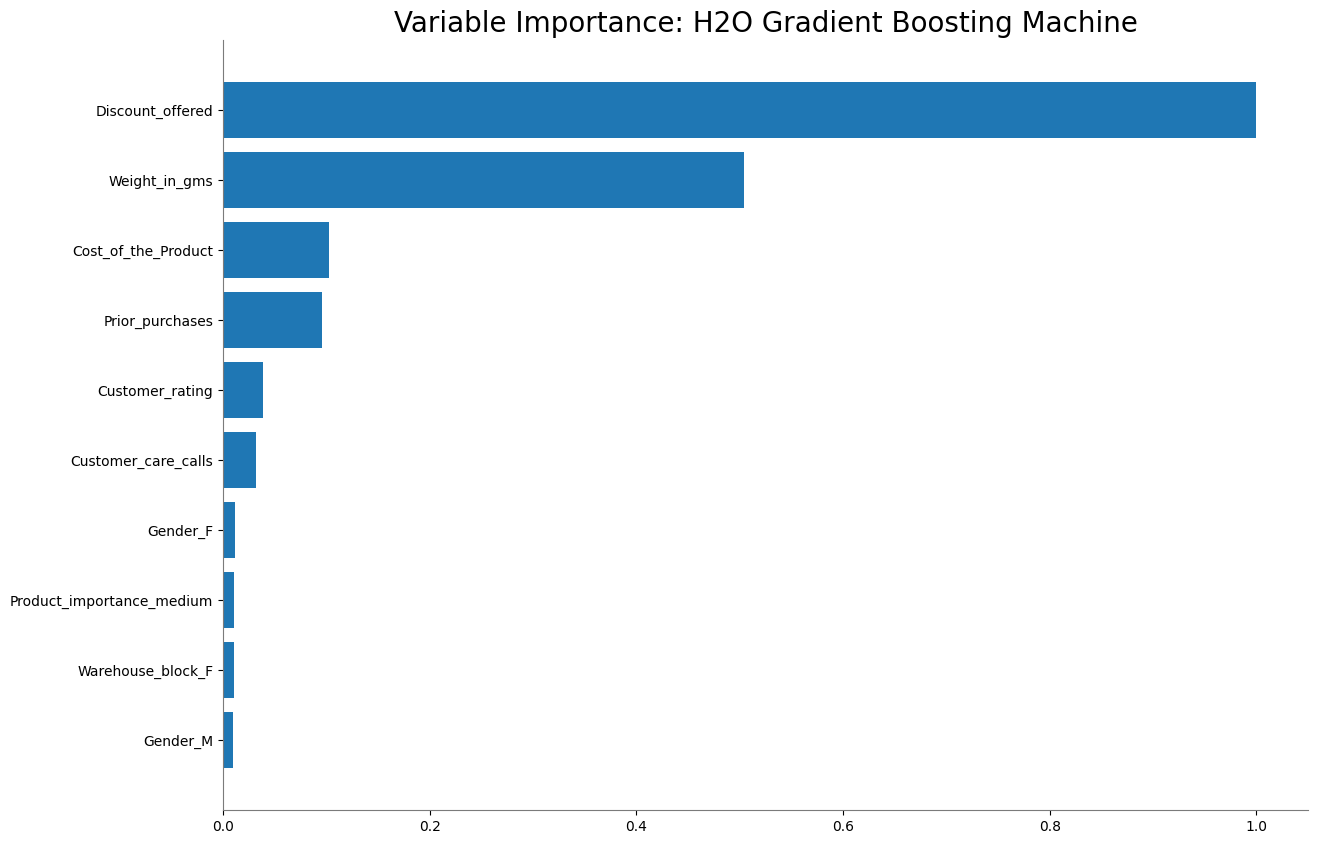

<Figure size 800x500 with 0 Axes>

In [98]:
%matplotlib inline
best_model.varimp_plot()

**Is the relationship significant?**

yes, because the R-squared is 0.651 which is in normal range above 5 and from stats model results the p is < 0.05 for independent variables 'Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Product_importance_high', 'Reached.on.Time_Y.N', Hence these are significant.


**Are any model assumptions violated?**

no, as the question is a classification question which make sense to all models in AutoML.

**Is there any multicollinearity in the model?**

All independent variable's Variance inflation factor is under threshold value of 10, no significant multicollinearity

**In the multivariate models are predictor variables independent of all the other predictor variables?**

We can observe from the correlation heatmap that there are no higher correlation coefficients between independent variables, indicating no dependency among them.

**In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

We can observe from the H2O Variable importance plot the model infact shows the
insignificant variables are gender, mode of shipment, warehouse but the model doesn't exclude them.


**Does the model make sense?**

yes, comparing the variable importances plot and logit regression results form stats model we can infer the model makes sense

**Does regularization help?**

no, the rmse from the best model is 0.42, however, in regularization, the rmse is 0.44 there's isn't much improvement.

**Which independent variables are significant?**

From Variable importance plot we can infer that features 'Customer_care_calls',
 'cost_of_product','Customer_rating', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Product_importance_high', 'Reached.on.Time_Y.N' are significant. Discount_offered has highest significance.

**Which hyperparameters are important?**

all hyperparameters are important because they determine the way model works such as alpha value in l2 normalization, learn_rate in GBM.

**Coding professionalism?**
yes


# Reference

1.Scikit learn official documentation

2.Dataset from kaggle by PRACHI GOPALANI

4.Code Reference from [Logistic Regression](https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Smoke_Detection_Example.ipynb) colab notebook.


# Conclusion

By employing variance inflation factor we minimize the number of independent variables hence, allow us to prevent overfitting on the model.

# License

MIT License

Copyright (c) 2024 Vinay Chelpuri

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.